In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from metrics import MAPE
from utils import resampling, split_data
from visualization import sample_to_scaleogram
from preprocess import make_cwt_data, make_target_data
import numpy as np
from model import create_model
from trainer import Trainer
from dataset import Dataset
from config import TrainConfig, DatasetConfig
# from preprocess import *

# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "NanumBarunGothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

RAW_PATH='data/nir_all_resampled_df.ftr'
PATH='C:/Users/SEC/Desktop/mnc_project1'

In [4]:
data_config = DatasetConfig()

In [5]:
dataset = Dataset(data_config)

In [ ]:
data

In [3]:
train.shape, valid.shape, test.shape

((1026, 1505), (129, 1505), (128, 1505))

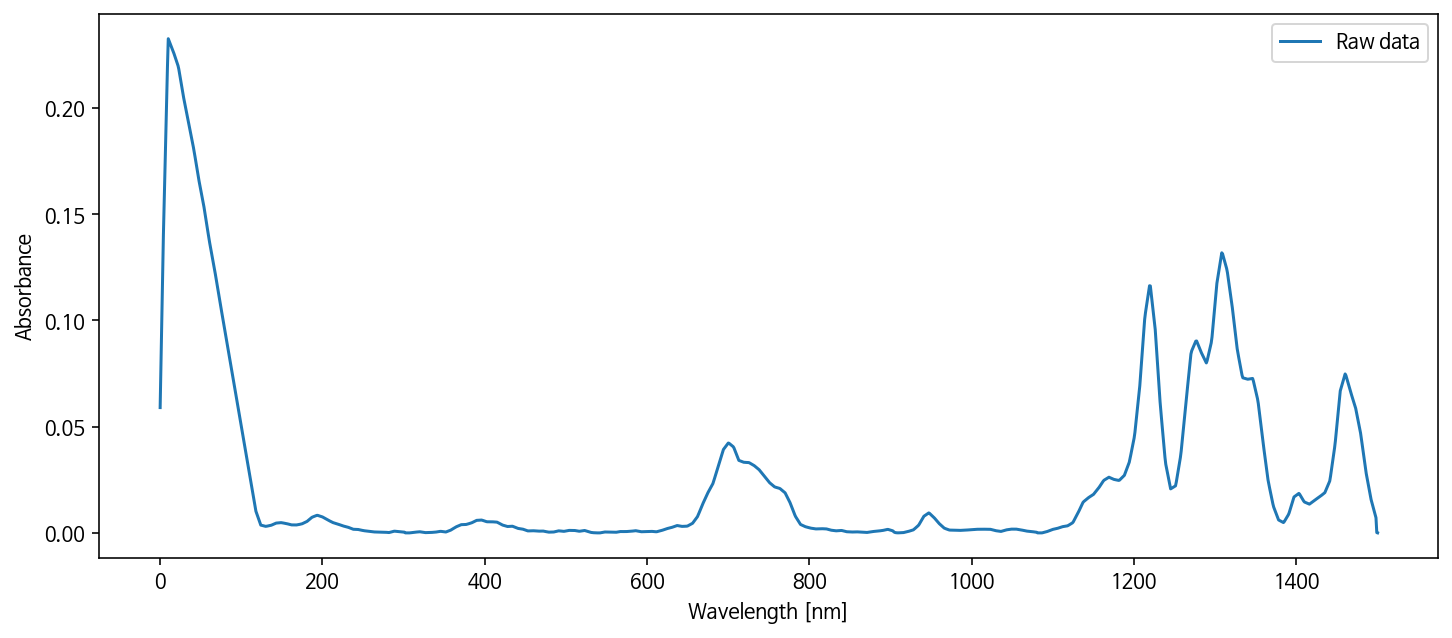

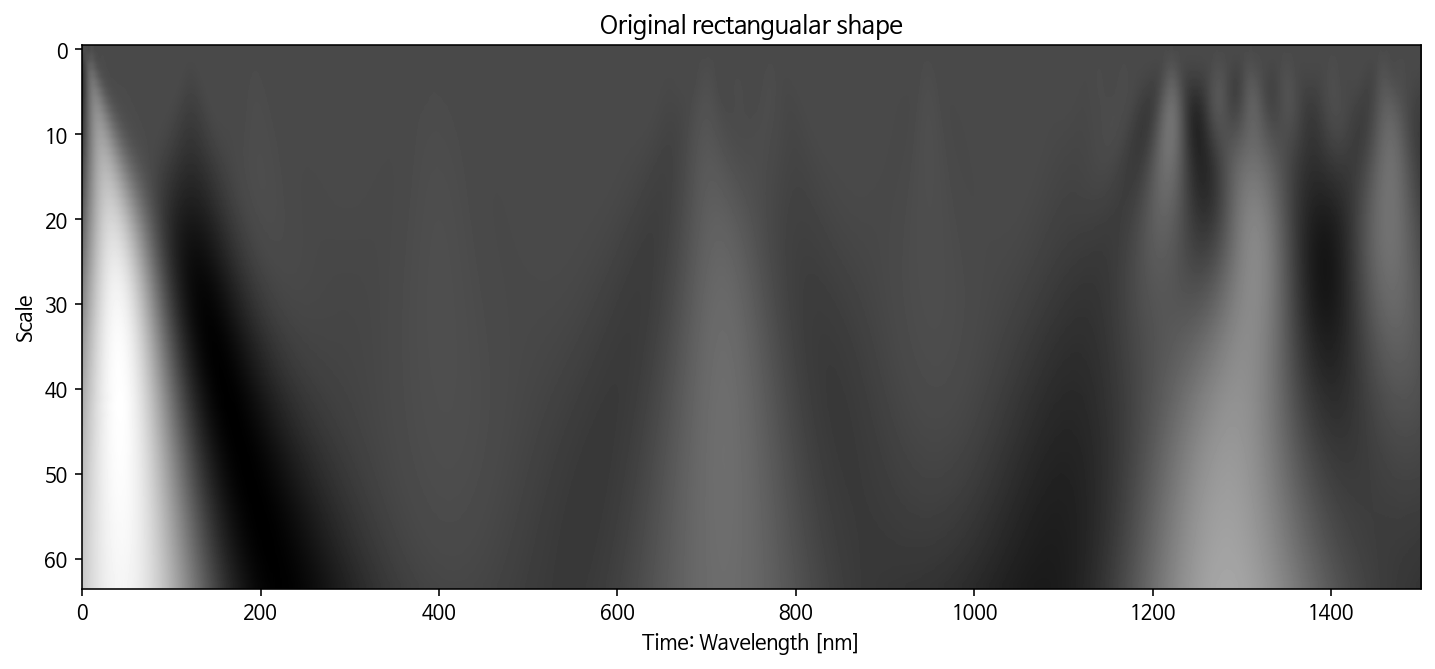

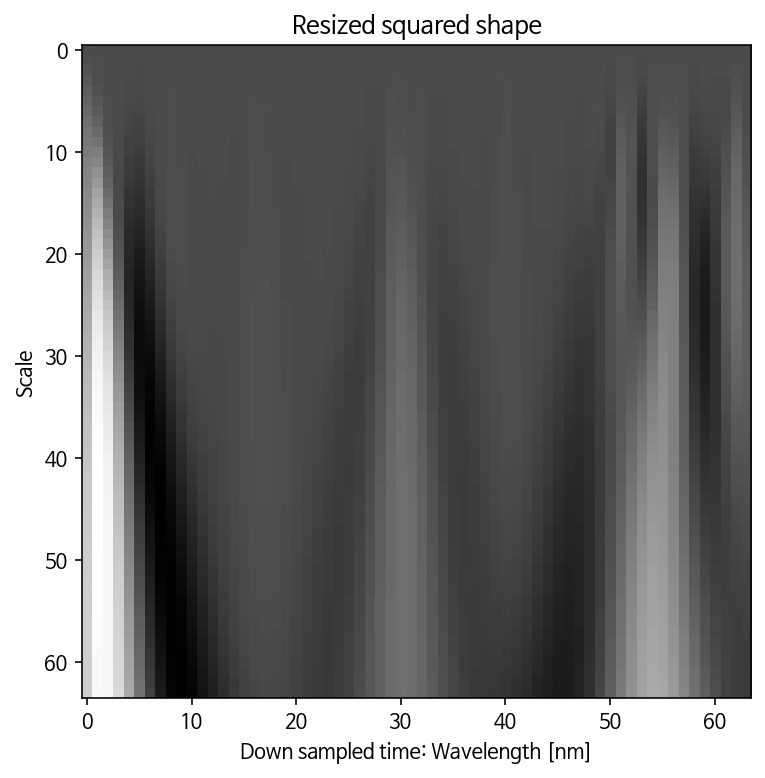

In [3]:
sample_to_scaleogram(check_df, signal_length=64, wavelet='mexh')

100%|██████████| 128/128 [00:02<00:00, 52.02it/s]


In [8]:
train_scalo_df.shape

(1026, 64, 64)

In [9]:
train['Sample Name'].values

array(['DE10', 'NIR_D56', 'NIR_KQ7', ..., 'KC43_D', 'NIR_K58', 'KD32'],
      dtype=object)

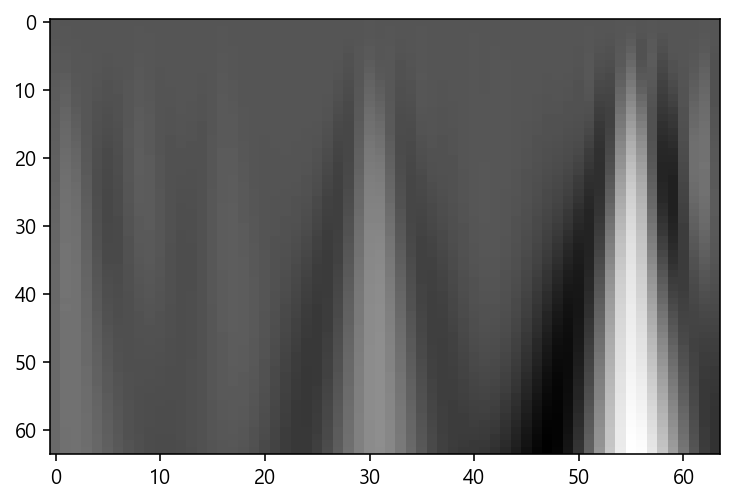

In [48]:
plt.imshow(train_scalo_df[0], cmap = 'gray', aspect = 'auto')

In [56]:
for i in tqdm(range(len(train_scalo_df))):
    plt.imshow(train_scalo_df[i], cmap = 'gray', aspect = 'auto')
    plt.imsave(f'C:/Users/SEC/Desktop/mnc_project1/data/image/train/{i}.png',train_scalo_df[i])
    plt.close('all')


In [58]:
for i in tqdm(range(len(valid_scalo_df))):
    plt.imshow(valid_scalo_df[i], cmap = 'gray', aspect = 'auto')
    plt.imsave(f'C:/Users/SEC/Desktop/mnc_project1/data/image/valid/{i}.png',valid_scalo_df[i])
    plt.close('all')


100%|████████████████████████████████████████████████████████████████████████████████| 129/129 [00:01<00:00, 74.63it/s]


In [59]:
for i in tqdm(range(len(test_scalo_df))):
    plt.imshow(test_scalo_df[i], cmap = 'gray', aspect = 'auto')
    plt.imsave(f'C:/Users/SEC/Desktop/mnc_project1/data/image/test/{i}.png',test_scalo_df[i])
    plt.close('all')


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 44.03it/s]


In [ ]:
import pickle

with open('data/scalo_df/train_scalo_df_mexh_3.pickle', 'wb') as f:
    pickle.dump(train_scalo_df, f)

with open('data/scalo_df/valid_scalo_df_mexh_3.pickle', 'wb') as f:
    pickle.dump(valid_scalo_df, f)

with open('data/scalo_df/test_scalo_df_mexh_3.pickle', 'wb') as f:
    pickle.dump(test_scalo_df, f)

In [12]:
log_Y_train=np.log1p(train[['F1','F2','F3']])
log_Y_valid=np.log1p(valid[['F1','F2','F3']]) 
log_Y_test=np.log1p(test[['F1','F2','F3']])

In [60]:
with open('data/scalo_df/log_Y_train.pickle', 'wb') as f:
    pickle.dump(log_Y_train, f)

with open('data/scalo_df/log_Y_valid.pickle', 'wb') as f:
    pickle.dump(log_Y_valid, f)

with open('data/scalo_df/log_Y_test.pickle', 'wb') as f:
    pickle.dump(log_Y_test, f)